Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
sns.set()

import numpy as np
from scipy import stats

Loading data for the good farms

In [ ]:
milk = pd.read_csv("AllMilkingsDaily_Weather.csv")
milk["Timestamp"] = pd.to_datetime(milk["Timestamp"])
milk = milk.set_index("Timestamp")

milk = milk[milk["FarmName_Pseudo"].isin(["ad0a39f5", "752efd72", "5c06d92d", "540275a1", "a624fb9a", "f454e660", "ab18b151"])]

And replacing the names

In [40]:
rDict = {"a624fb9a": "Farm 1",
    "ab18b151": "Farm 2",
    "540275a1": "Farm 3",
    "5b581702": "Farm 4",
    "5c06d92d": "Farm 5",
    "a756bc39": "Farm 6",
    "ad0a39f5": "Farm 7",
    "752efd72": "Farm 8",
    "f454e660": "Farm 9"}
    
milk = milk.replace({"FarmName_Pseudo": rDict})

farmNames = milk["FarmName_Pseudo"].unique()

Average of each day

In [41]:
aMilk = milk.groupby(["Timestamp", "FarmName_Pseudo"]).agg({"DailyYield": "mean", "r_sfc_mean": "first", "THI_mean": "first", "T_C_mean": "first", "THI_adj_mean": "first"})
aMilk = aMilk.reset_index()
aMilk = aMilk.set_index("Timestamp")

Sorting farms by correlation

In [42]:
farmCorrs = pd.DataFrame()
farmCorrs["Name"] = farmNames
farmCorrs["corr"] = "" #Correlations on a per cow and day basis for each farm
farmCorrs["aCorr"] = "" #Correlations on a per day basis for each farm
farmCorrs = farmCorrs.set_index("Name")

for name in farmNames:
    farm = milk[milk["FarmName_Pseudo"] == name]
    farm = farm[(np.abs(stats.zscore(farm["DailyYield"])) < 3)]
    corr = farm["DailyYield"].corr(farm["T_C_mean"], method = "pearson")
    aFarm = aMilk[aMilk["FarmName_Pseudo"] == name]
    aFarm = aFarm[(np.abs(stats.zscore(aFarm["DailyYield"])) < 3)]
    aCorr = aFarm["DailyYield"].corr(aFarm["T_C_mean"], method = "pearson")
    farmCorrs.loc[name, 'corr'] = corr
    farmCorrs.loc[name, 'aCorr'] = aCorr

farmCorrs = farmCorrs.sort_values("corr")

farmCorrs

,corr,aCorr
Name,,
Farm 2,-0.100987,-0.601741
Farm 8,-0.114623,-0.463163
Farm 1,-0.036892,-0.137567
Farm 7,-0.00941,-0.082988
Farm 3,-0.016322,-0.080471
Farm 9,-0.01525,-0.05649
Farm 5,0.016636,0.10689


In [43]:
sortedFarms = list(farmCorrs.index)

Plotting yield curves sorted by correlation. High to low.

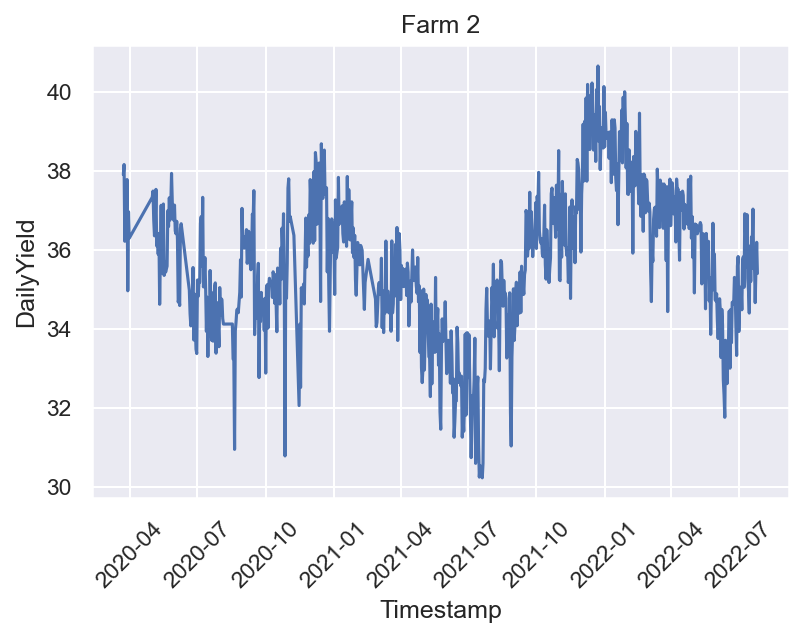

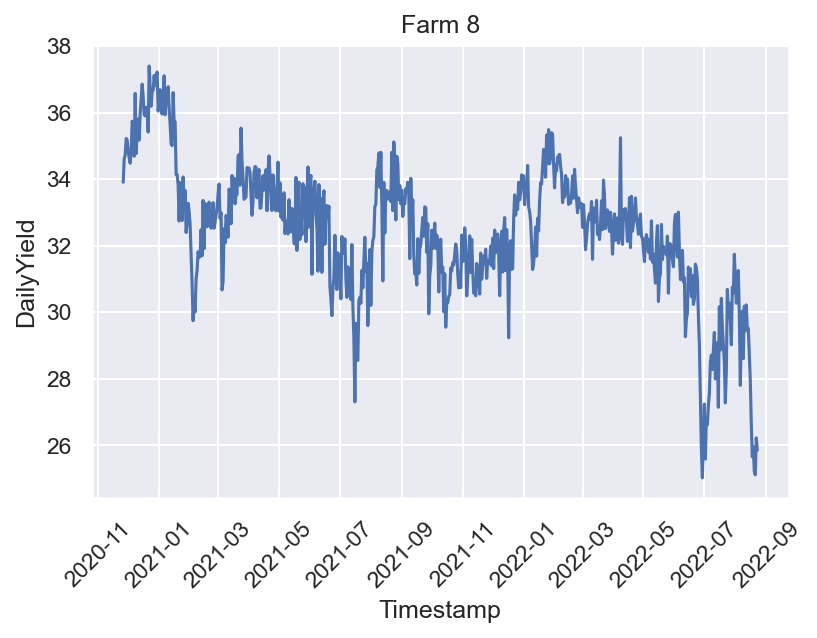

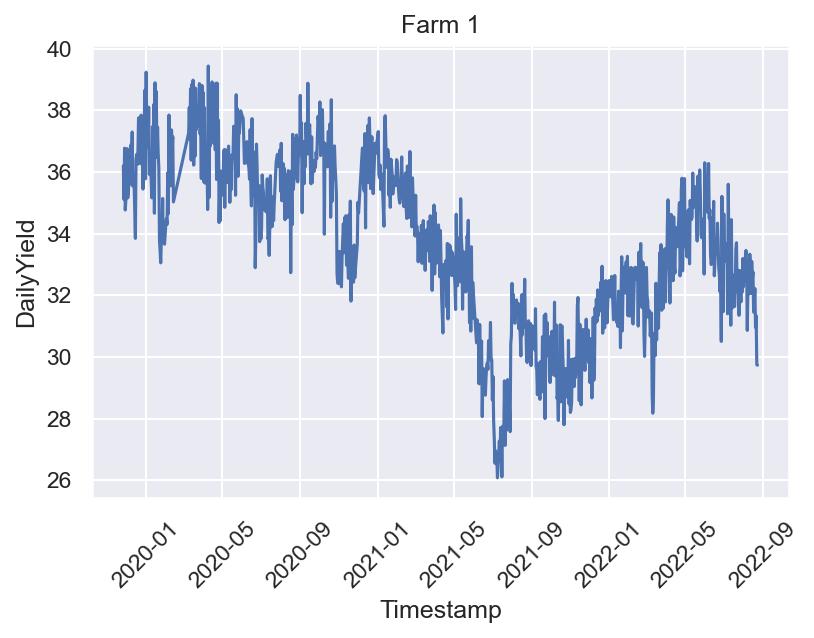

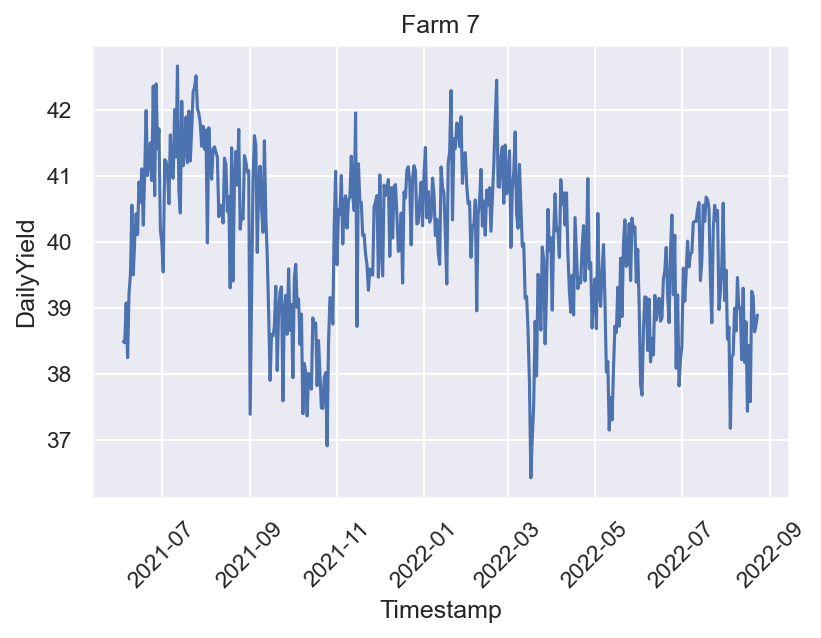

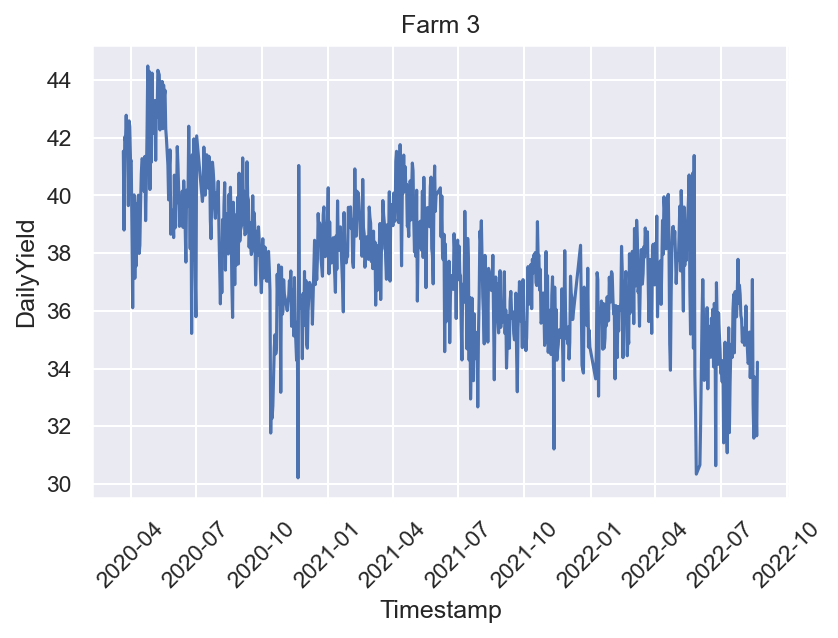

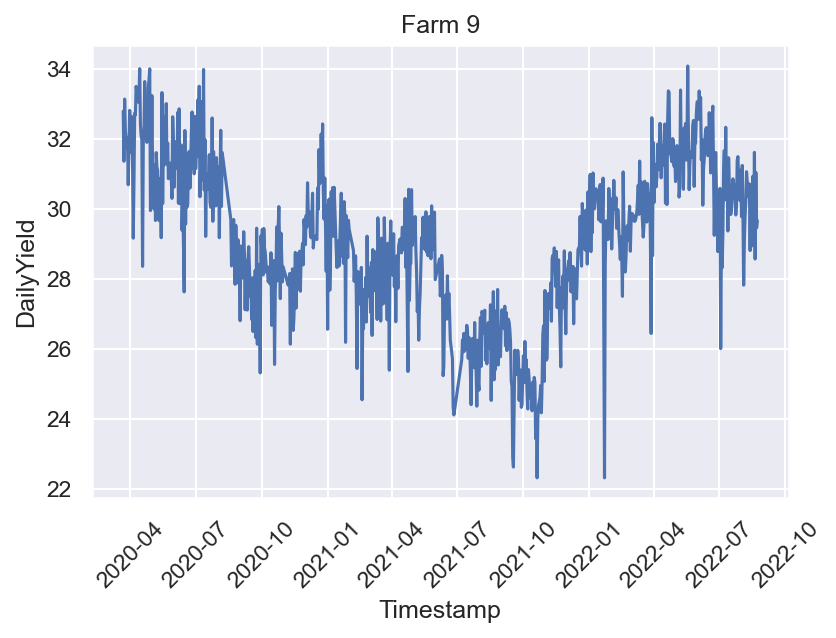

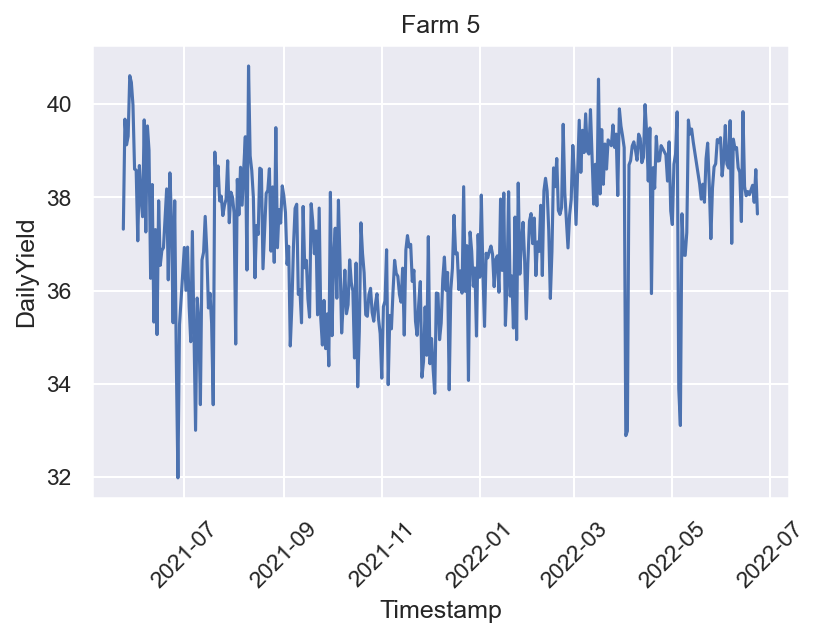

In [46]:
for name in sortedFarms:
    farm = aMilk[aMilk["FarmName_Pseudo"] == name]
    farm = farm[(np.abs(stats.zscore(farm["DailyYield"])) < 3)]
    sns.lineplot(farm["DailyYield"])
    plt.title(name)
    plt.xticks(rotation = 45)
    plt.show()

Plotting autocorrelation sorted by correlation. High to low.

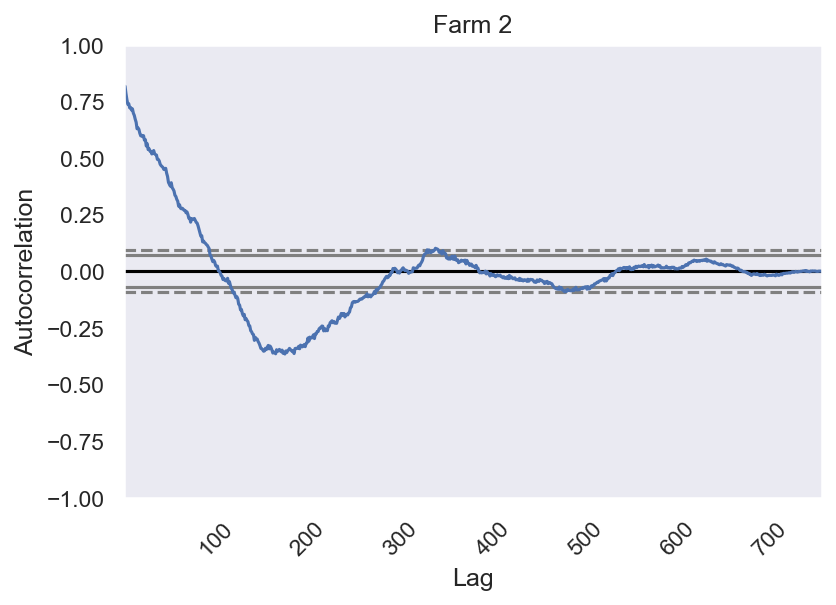

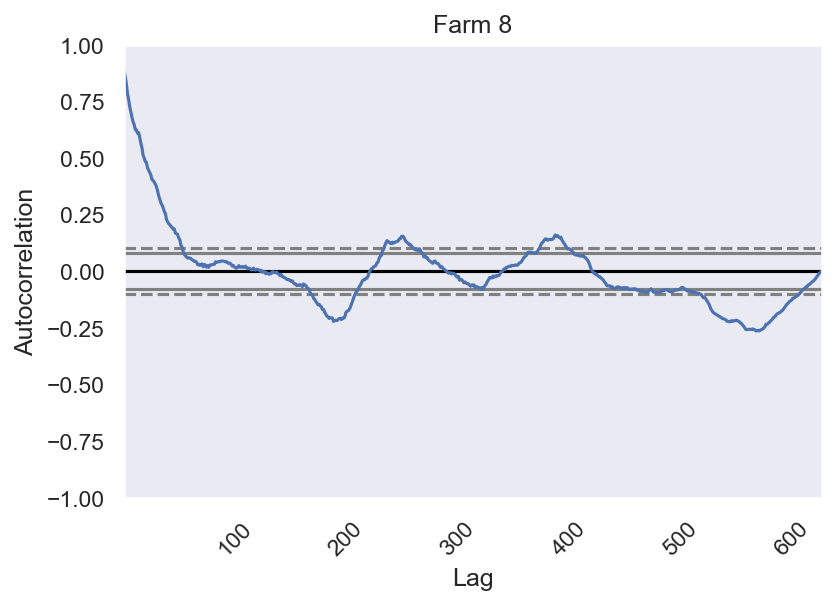

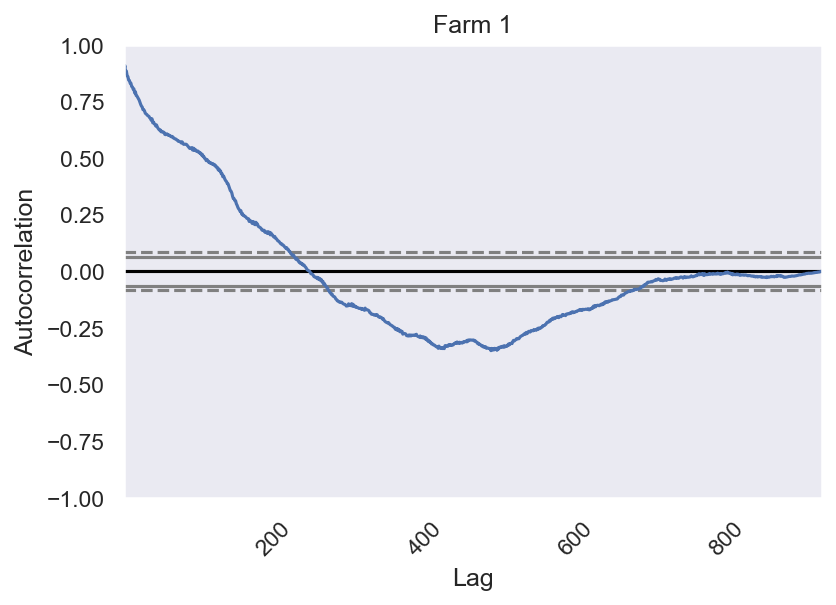

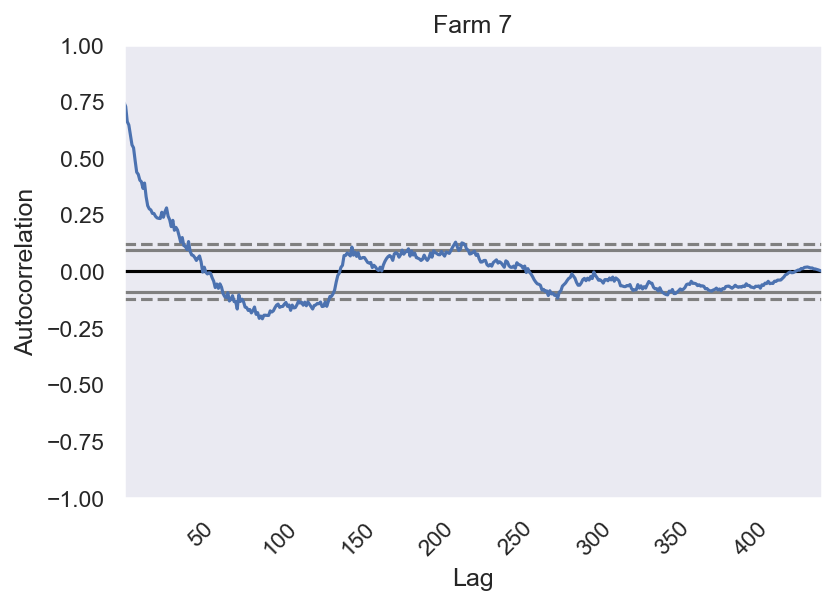

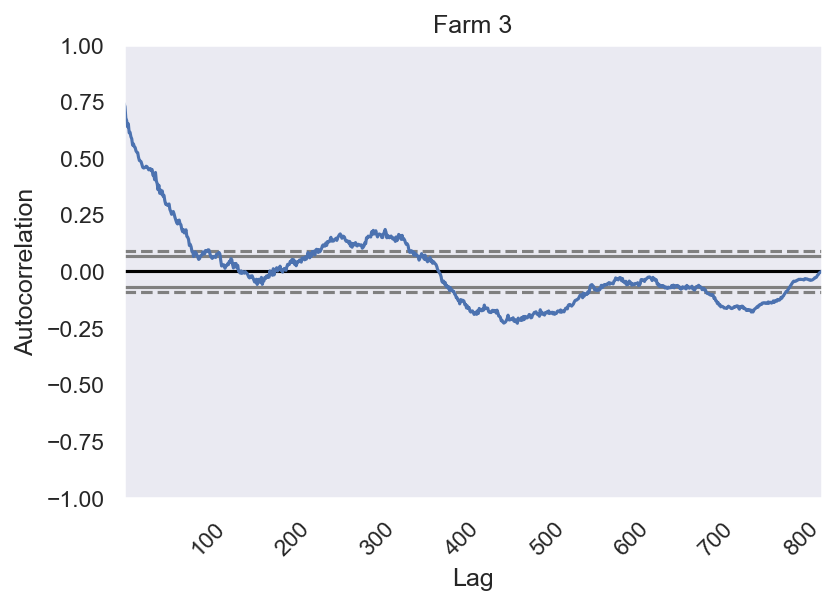

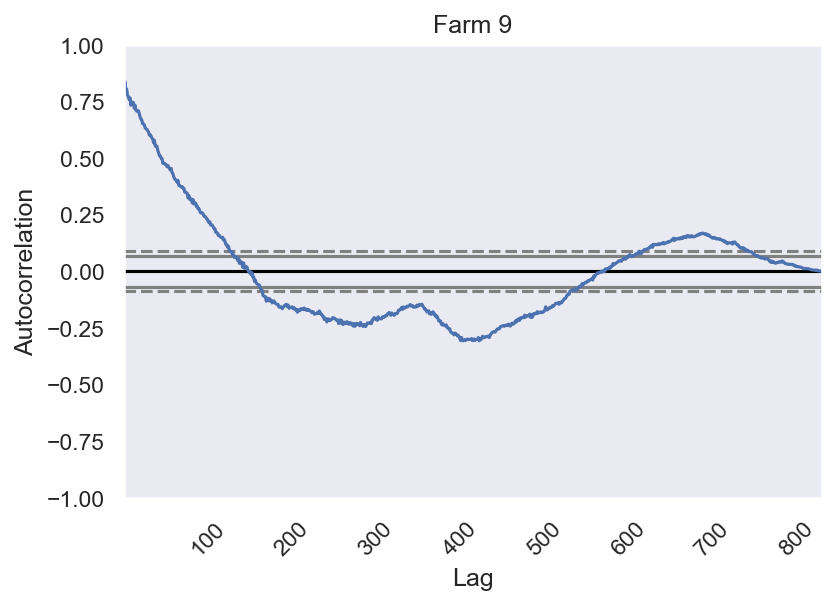

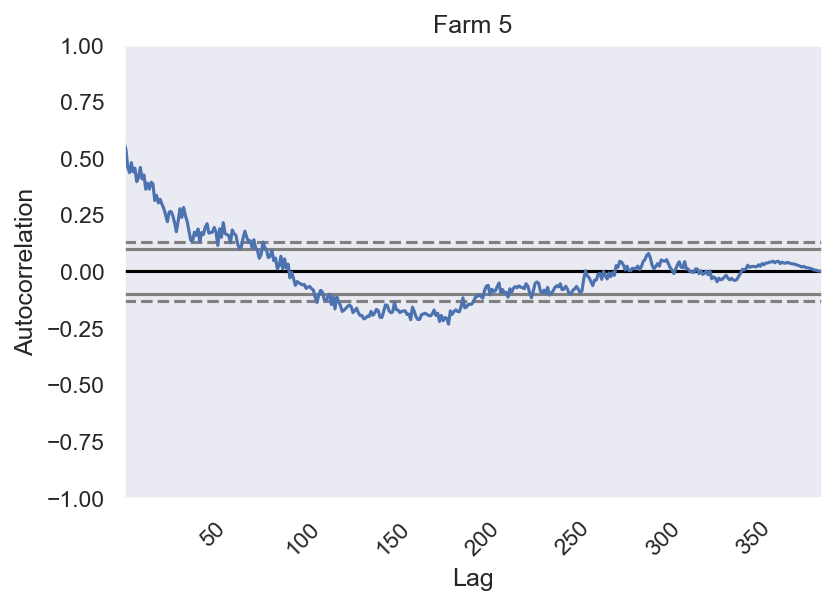

In [47]:
for name in sortedFarms:
    farm = aMilk[aMilk["FarmName_Pseudo"] == name]
    farm = farm[(np.abs(stats.zscore(farm["DailyYield"])) < 3)]
    pd.plotting.autocorrelation_plot(farm["DailyYield"]).plot()
    plt.title("Autocorrelation for milk yield")
    plt.title(name)
    plt.xticks(rotation = 45)
    plt.show()

Conclusion:
1. The farms with a high correlation between milk yield and daily temperature show the clearest peak around day 365 in the autocorrelation, suggesting the correlation could be caused by a yearly pattern in the milk yield which could in turn be caused by syncronized laction periods.